In [1]:
import seaborn as sns 
from datascience import *
from datascience.predicates import *
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline 

plt.style.use('classic')


In [2]:
#Powerlifting Data Set
#Link to Data set: https://www.kaggle.com/open-powerlifting/powerlifting-database

lift = pd.DataFrame.from_csv("openpowerlifting.csv")
lift = lift.dropna()
lift

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
MeetID,,,,,,,,,,,,,,,,
15,Rocky Luedeker,F,Raw,61.0,R Open,45.27,48,42.50,37.50,33.50,32.50,60.00,57.50,127.50,1,176.090
15,Rocky Luedeker,F,Raw,61.0,RM 60-64,45.27,48,42.50,37.50,33.50,32.50,60.00,57.50,127.50,1,176.090
32,Nancy Lowther,F,Wraps,58.0,Open NT,86.41,90,115.67,111.13,-77.11,72.57,127.01,122.47,306.17,1,269.330
32,Nancy Lowther,F,Wraps,58.0,Master HVY,86.41,90,115.67,111.13,-77.11,72.57,127.01,122.47,306.17,1,269.330
44,Carol Moorhead,F,Wraps,55.0,Open,74.39,75,90.72,88.45,49.90,47.63,102.06,97.52,233.60,1,223.220
44,Nancy Lowther,F,Wraps,58.0,Open,87.09,90,113.40,111.13,72.57,70.31,120.20,115.67,297.10,1,260.410
59,Michael Megler,M,Single-ply,16.0,M_TES_2_WPC,73.40,75,167.50,165.00,102.50,100.00,205.00,200.00,465.00,1,336.430
59,Carrie Goldstein,F,Wraps,54.0,F_MR_3_WPC,60.00,60,-110.00,107.50,-77.50,75.00,-145.00,142.50,325.00,1,362.340
59,Gerald Pervis,M,Wraps,75.0,M_MR_8_WPC,93.40,100,122.50,117.50,-97.50,92.50,185.00,182.50,392.50,1,246.070


In [3]:
columns = ["Name", "Sex", "Equipment", "Age", "Division", "BodyweightKg", "TotalKg", "Place", "Wilks", "WeightClassKg"]
lifts = ["BestSquatKg", "BestBenchKg", "BestDeadliftKg"]

In [4]:
#Making M = Male, F = Female
lift['Sex'][lift.Sex == "M"] = "Male"
lift['Sex'][lift.Sex == "F"] = "Female"
lift

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
MeetID,,,,,,,,,,,,,,,,
15,Rocky Luedeker,Female,Raw,61.0,R Open,45.27,48,42.50,37.50,33.50,32.50,60.00,57.50,127.50,1,176.090
15,Rocky Luedeker,Female,Raw,61.0,RM 60-64,45.27,48,42.50,37.50,33.50,32.50,60.00,57.50,127.50,1,176.090
32,Nancy Lowther,Female,Wraps,58.0,Open NT,86.41,90,115.67,111.13,-77.11,72.57,127.01,122.47,306.17,1,269.330
32,Nancy Lowther,Female,Wraps,58.0,Master HVY,86.41,90,115.67,111.13,-77.11,72.57,127.01,122.47,306.17,1,269.330
44,Carol Moorhead,Female,Wraps,55.0,Open,74.39,75,90.72,88.45,49.90,47.63,102.06,97.52,233.60,1,223.220
44,Nancy Lowther,Female,Wraps,58.0,Open,87.09,90,113.40,111.13,72.57,70.31,120.20,115.67,297.10,1,260.410
59,Michael Megler,Male,Single-ply,16.0,M_TES_2_WPC,73.40,75,167.50,165.00,102.50,100.00,205.00,200.00,465.00,1,336.430
59,Carrie Goldstein,Female,Wraps,54.0,F_MR_3_WPC,60.00,60,-110.00,107.50,-77.50,75.00,-145.00,142.50,325.00,1,362.340
59,Gerald Pervis,Male,Wraps,75.0,M_MR_8_WPC,93.40,100,122.50,117.50,-97.50,92.50,185.00,182.50,392.50,1,246.070


Text(0.5,1,'Male and Female Squat')

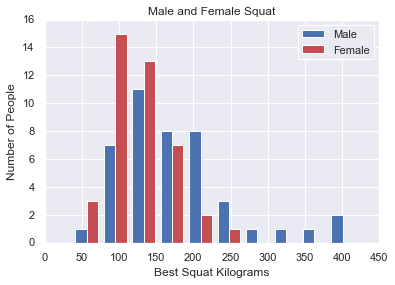

In [15]:
#Histogram 
#Sex and the weight they lift for their Best Squat

sns.set()

maledf = lift[['Sex','BestSquatKg']].copy()
maledf = maledf.loc[maledf['Sex'] == "Male"]
femaledf = lift[['Sex','BestSquatKg']].copy()
femaledf = femaledf.loc[femaledf['Sex'] == "Female"]
plt.hist([maledf['BestSquatKg'],femaledf['BestSquatKg']], color=['b','r'], label=['Male', 'Female'])
plt.xlabel('Best Squat Kilograms')
plt.ylabel('Number of People')
plt.legend(loc='upper right')
plt.savefig("histPlot.png")
plt.title("Male and Female Squat")

Text(0.5,1,'Bodyweight and Squat')

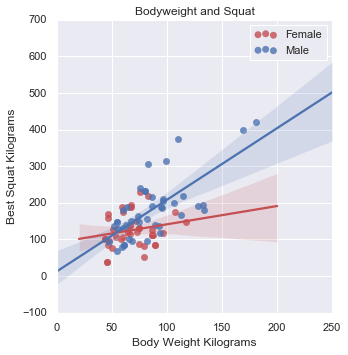

In [16]:
#Scatter plot of their weight and best squat 
#Showing how the more you weigh, the more you lift

scatterdf = lift[['Sex','BodyweightKg','BestSquatKg']].copy()
sns.lmplot('BodyweightKg', 'BestSquatKg', data=scatterdf, fit_reg=True, hue='Sex', legend=False,
          palette=dict(Male='b',Female='r'), scatter_kws={"s":40})
plt.xlabel('Body Weight Kilograms')
plt.ylabel('Best Squat Kilograms')
#title
plt.legend(loc='upper right')
plt.savefig("scatterPlot.png")
plt.title("Bodyweight and Squat")

In [7]:
#Creating Columns 
#Storing the "type" of lift they did (Squat, Bench, Deadlift)
#Storing the "value" of their best lift 

new_lifts = {col:[] for col in columns}
new_lifts["type"] = []
new_lifts["value"] = []

for index, row in lift.iterrows():
    for l in lifts:
        for col in columns:
            new_lifts[col].append(row[col])
            
        new_lifts["type"].append(l)
        try:
            new_lifts["value"].append(float(row[l]))
        except Exception as e:
            new_lifts["value"].append(float(row[l][:-1]))
        
        

new_lifts = pd.DataFrame(data=new_lifts)
new_lifts.head()

,Name,Sex,Equipment,Age,Division,BodyweightKg,TotalKg,Place,Wilks,WeightClassKg,type,value
0,Rocky Luedeker,Female,Raw,61.0,R Open,45.27,127.5,1,176.09,48,BestSquatKg,37.5
1,Rocky Luedeker,Female,Raw,61.0,R Open,45.27,127.5,1,176.09,48,BestBenchKg,32.5
2,Rocky Luedeker,Female,Raw,61.0,R Open,45.27,127.5,1,176.09,48,BestDeadliftKg,57.5
3,Rocky Luedeker,Female,Raw,61.0,RM 60-64,45.27,127.5,1,176.09,48,BestSquatKg,37.5
4,Rocky Luedeker,Female,Raw,61.0,RM 60-64,45.27,127.5,1,176.09,48,BestBenchKg,32.5


In [8]:
new_lifts.describe()

,Age,BodyweightKg,TotalKg,Wilks,value
count,252.000000,252.000000,252.000000,252.000000,252.000000
mean,39.250000,77.494405,437.849643,363.533583,145.951905
std,18.128937,26.094117,171.055109,100.513780,67.642379
min,14.000000,44.000000,127.500000,176.090000,32.500000
25%,22.000000,59.850000,310.000000,294.740000,95.000000
50%,39.000000,73.895000,402.750000,357.550000,138.175000
75%,54.250000,88.600000,530.080000,414.515000,185.500000
max,75.000000,181.200000,980.000000,560.710000,420.000000


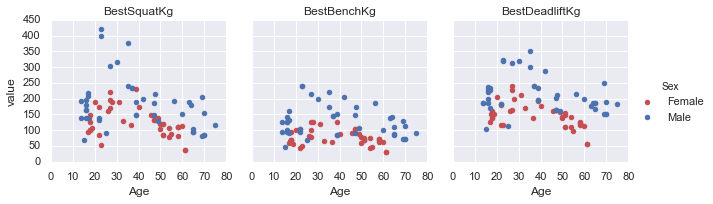

In [18]:
#FacetGrid of each lift, organized by sex

sns.set()

g = sns.FacetGrid(new_lifts, col="type", hue="Sex", palette=dict(Male='b',Female='r'))
g.map(plt.scatter, "Age", "value")

g.set_titles("{col_name}")
g.add_legend()

In [10]:
#Calculates ratio: Value / Bodyweight
#Trying to show who is lifting over their body weight and by how much 
for l in lifts:
    lift[l+"Ratio"] = lift[l] / lift["BodyweightKg"]
    
new_lifts["ratio"] = new_lifts["value"] / new_lifts["BodyweightKg"]

lift.head()

,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks,BestSquatKgRatio,BestBenchKgRatio,BestDeadliftKgRatio
MeetID,,,,,,,,,,,,,,,,,,,
15,Rocky Luedeker,Female,Raw,61.0,R Open,45.27,48,42.50,37.50,33.50,32.50,60.00,57.50,127.50,1,176.09,0.828363,0.717915,1.270157
15,Rocky Luedeker,Female,Raw,61.0,RM 60-64,45.27,48,42.50,37.50,33.50,32.50,60.00,57.50,127.50,1,176.09,0.828363,0.717915,1.270157
32,Nancy Lowther,Female,Wraps,58.0,Open NT,86.41,90,115.67,111.13,-77.11,72.57,127.01,122.47,306.17,1,269.33,1.286078,0.839833,1.417313
32,Nancy Lowther,Female,Wraps,58.0,Master HVY,86.41,90,115.67,111.13,-77.11,72.57,127.01,122.47,306.17,1,269.33,1.286078,0.839833,1.417313
44,Carol Moorhead,Female,Wraps,55.0,Open,74.39,75,90.72,88.45,49.90,47.63,102.06,97.52,233.60,1,223.22,1.189004,0.640274,1.310929


In [11]:
new_lifts.head()

,Name,Sex,Equipment,Age,Division,BodyweightKg,TotalKg,Place,Wilks,WeightClassKg,type,value,ratio
0,Rocky Luedeker,Female,Raw,61.0,R Open,45.27,127.5,1,176.09,48,BestSquatKg,37.5,0.828363
1,Rocky Luedeker,Female,Raw,61.0,R Open,45.27,127.5,1,176.09,48,BestBenchKg,32.5,0.717915
2,Rocky Luedeker,Female,Raw,61.0,R Open,45.27,127.5,1,176.09,48,BestDeadliftKg,57.5,1.270157
3,Rocky Luedeker,Female,Raw,61.0,RM 60-64,45.27,127.5,1,176.09,48,BestSquatKg,37.5,0.828363
4,Rocky Luedeker,Female,Raw,61.0,RM 60-64,45.27,127.5,1,176.09,48,BestBenchKg,32.5,0.717915


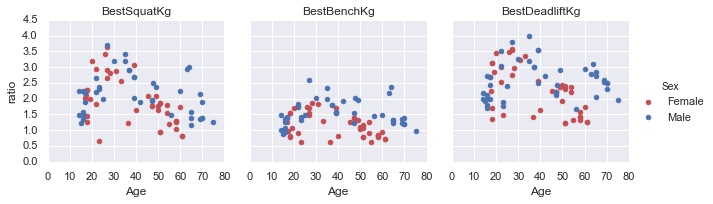

In [12]:
#Pound for Pound: Showing what there weight and what they lifted
#Pound they lift per Pound they weight 
#Organized by Age 
sns.set()

g = sns.FacetGrid(new_lifts, col="type", hue="Sex", palette=dict(Male='b',Female='r'))
g.map(plt.scatter, "Age", "ratio")

g.set_titles("{col_name}")
g.add_legend()

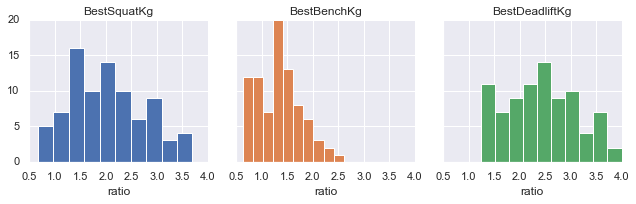

In [13]:
#Frequency of each ratio 
sns.set()

g = sns.FacetGrid(new_lifts, col="type", hue="type")
g.map(plt.hist, "ratio")

g.set_titles("{col_name}")

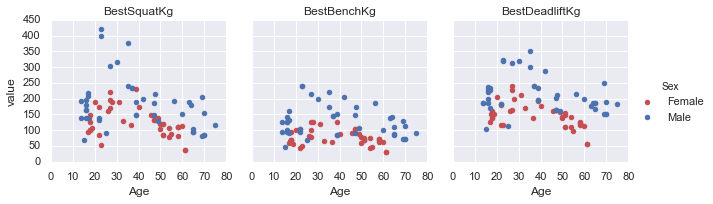

In [14]:
#Data: Amount of kilograms lifted vs Age 
sns.set()

g = sns.FacetGrid(new_lifts, col="type", hue="Sex", palette=dict(Male = 'b', Female = 'r'))
g.map(plt.scatter, "Age", "value")
g.set_titles("{col_name}")

g.add_legend()